In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [10]:
house_info = pd.read_csv('Housing.csv')
house_info.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
house_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
house_info.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
house_info.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
yes_no_params = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
yes_no_check = []
for check_param in yes_no_params:
    yes_no_check.append(check_param)
    yes_no_check.append(house_info[check_param].unique())

yes_no_check

['mainroad',
 array(['yes', 'no'], dtype=object),
 'guestroom',
 array(['no', 'yes'], dtype=object),
 'basement',
 array(['no', 'yes'], dtype=object),
 'hotwaterheating',
 array(['no', 'yes'], dtype=object),
 'airconditioning',
 array(['yes', 'no'], dtype=object),
 'prefarea',
 array(['yes', 'no'], dtype=object)]

In [36]:
house_info = pd.get_dummies(data=house_info, drop_first=True, dtype=float).astype(int)

house_info

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,1,0,1,0,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,0,1,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [38]:
corr = house_info.corr()
corr

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.042398,0.126469,0.102106,0.067159,0.186915,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.121706,0.043538,-0.172394,0.018847,0.293602,0.044425,-0.003648,-0.082972
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.204433,0.037466,0.051497,0.067864,0.159173,0.091627,0.041327,-0.165705
mainroad_yes,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,0.011450,-0.133123
guestroom_yes,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,0.005821,-0.099023
basement_yes,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,0.050284,-0.117935
hotwaterheating_yes,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,0.063819,-0.059194


<Axes: >

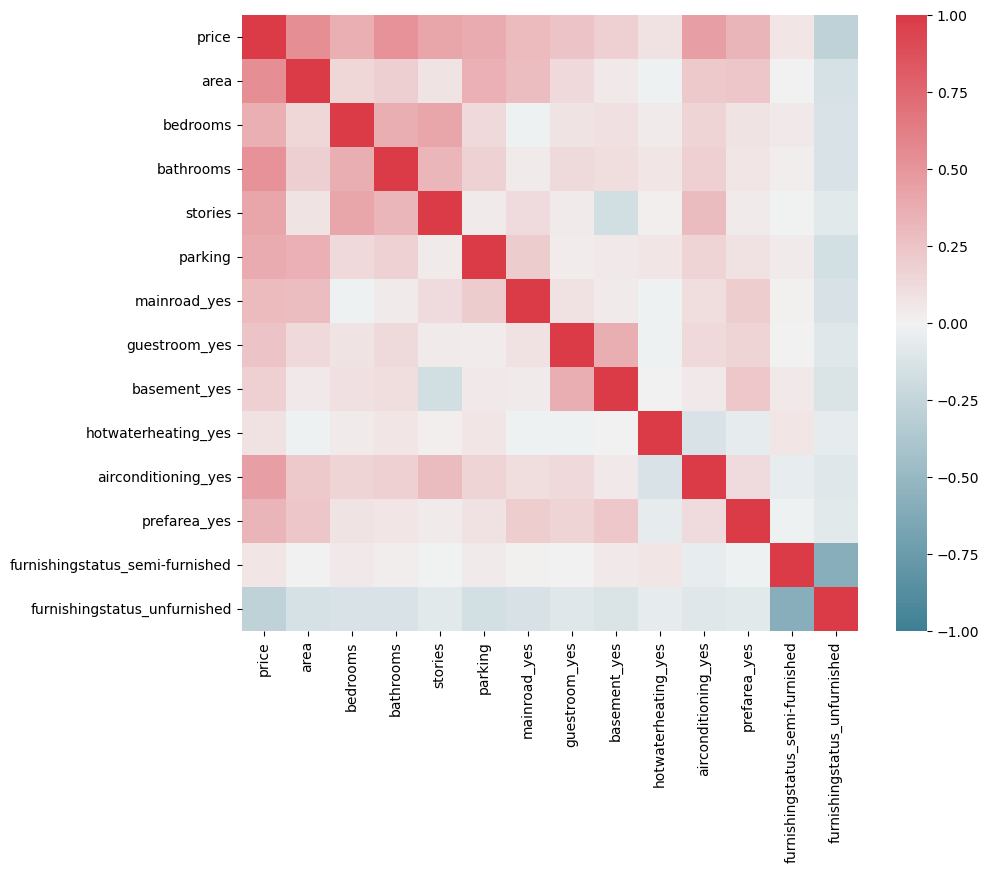

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [42]:
data = house_info.drop(['price'], axis = 1, inplace = False).values
target = house_info['price'].values

x, y = scale(data), target

In [43]:
LinReg = LinearRegression()

LinReg.fit(x,y)

print(LinReg.score(x,y))

0.681801848554014


In [49]:
LinReg = LinearRegression()

info = []

target = house_info['price'].values
for dropped_column in house_info.axes[1]:
    data = house_info.drop(['price', dropped_column],
                           axis = 1, inplace = False).values
    x, y = scale(data), target
    LinReg.fit(x,y)
    scr = LinReg.score(x,y)
    print('Column ', dropped_column, ', Score = ', scr)
    info.append(scr)

    
max(info)

Column  price , Score =  0.681801848554014
Column  area , Score =  0.6212585196586397
Column  bedrooms , Score =  0.6803037668076195
Column  bathrooms , Score =  0.6270872061930561
Column  stories , Score =  0.6522207822864415
Column  parking , Score =  0.6683679392109818
Column  mainroad_yes , Score =  0.6765443039043331
Column  guestroom_yes , Score =  0.6786820404564433
Column  basement_yes , Score =  0.6757626540796774
Column  hotwaterheating_yes , Score =  0.672995715505779
Column  airconditioning_yes , Score =  0.6436162600838555
Column  prefarea_yes , Score =  0.6627929804457595
Column  furnishingstatus_semi-furnished , Score =  0.6817071381430335
Column  furnishingstatus_unfurnished , Score =  0.675439893434549


0.681801848554014

C:\Users\Николай\AppData\Local\Temp\ipykernel_12216\1577886824.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r." (-> color='r'). The keyword argument will take precedence.
  model = plt.plot(house_info['area'], y_pred, 'r.', color = 'blue')


<function matplotlib.pyplot.show(close=None, block=None)>

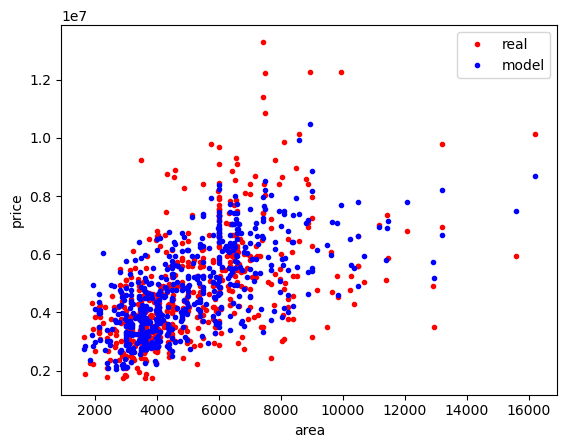

In [50]:
y_pred = LinReg.predict(x)

real = plt.plot(house_info['area'], house_info['price'], 'r.')
plt.xlabel('area')
plt.ylabel('price')

model = plt.plot(house_info['area'], y_pred, 'r.', color = 'blue')

plt.legend(['real', 'model'])

plt.show